# Life Expectancy

## Scope of the Project

### Goals
* Describe the dependence of Life expetancy on the other numerical factors by Country
* Is life expectancy/GDP increasing over the years?
* Do the pct changes in GDP follow any particular distribution?
* Are there any momentum effects on the GDP's?
* We can expect that the global financial crisis of 2008 had an effect on the countries GDP. Did the crisis induce any effects on the life expectancy on any of the countries?

## Imports

In [127]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from cycler import cycler
sns.set()

## Data

### Imports and Adjustments

In [86]:
data = pd.read_csv('all_data.csv')
print(data.head())
# Normalize GDP to order 10bn
data['GDP_bnnorm'] = data['GDP'].map(lambda x: x/(10**10))
# Handle the large orders of magnitude with log
data['GDP_lognorm'] = data['GDP'].map(lambda x: np.log10(x))

# Simplify name of Life expectancy column
data.rename(columns={'Life expectancy at birth (years)':'LEABY'}, inplace=True)

# Percent changes of Life expectancy and GDP over time
data[['LEABY_pct_ch', 'GDP_pct_ch']] = data[['LEABY', 'GDP', 'Country']].groupby('Country').pct_change()

# Simplify name of the United States
data['Country'] = data['Country'].map(lambda x: 'US' if x == 'United States of America' else x)
print(data.head())

data_dict = {country: data[data['Country'] == country].drop(columns=['Country'], axis=1) for country in data.Country.unique()}

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
  Country  Year  LEABY           GDP  GDP_bnnorm  GDP_lognorm  LEABY_pct_ch  \
0   Chile  2000   77.3  7.786093e+10    7.786093    10.891320           NaN   
1   Chile  2001   77.3  7.097992e+10    7.097992    10.851136      0.000000   
2   Chile  2002   77.8  6.973681e+10    6.973681    10.843462      0.006468   
3   Chile  2003   77.9  7.564346e+10    7.564346    10.878771      0.001285   
4   Chile  2004   78.0  9.921039e+10    9.921039    10.996557      0.001284   

   GDP_pct_ch  
0         NaN  
1   -0.088376  
2   -0.017514  
3    0.084699  
4    0.311553  


### Exploration

We start with a quick comparison of the GDP and Life expetancy for each country. Since the data points are distributed over time, it wouldn't be that interesting to simply look at the mean for each numerical variable. Instead, we will look at the percentage changes from year to year to see if we can identify a distribution of these data points. The means of these distributions can then be interpreted as a drift over time. To get an overview, we first look at violin and swarm plots for both the percent change in GDP and life expectancy.

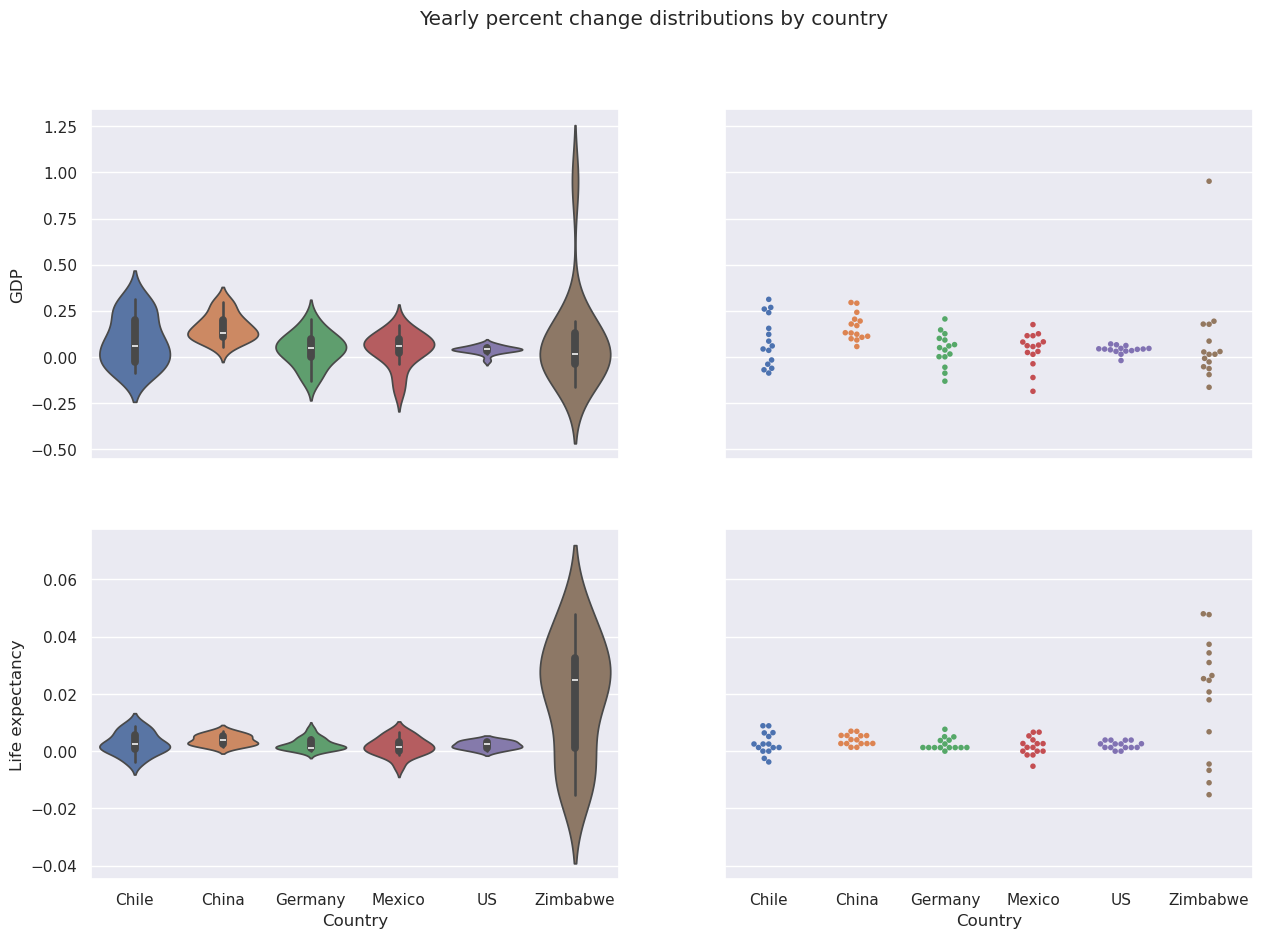

In [124]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10), sharex='col', sharey='row')

sns.violinplot(data=data.dropna(), y='GDP_pct_ch', x='Country', hue='Country', density_norm='area', ax=ax[0][0])
sns.swarmplot(data=data.dropna(), y='GDP_pct_ch', x='Country', hue='Country', size=4, ax=ax[0][1])
sns.violinplot(data=data.dropna(), y='LEABY_pct_ch', x='Country', hue='Country', density_norm='area', ax=ax[1][0])
sns.swarmplot(data=data.dropna(), y='LEABY_pct_ch', x='Country', hue='Country', size=4, ax=ax[1][1])

fig.suptitle('Yearly percent change distributions by country')

ax[0][0].set_ylabel('GDP')
ax[1][0].set_ylabel('Life expectancy')
plt.show()

The plots on the left show the general distributions inferred by the data while the plots on the right show the actual data points. Since we only have 15 data points we should be careful about drawing any conclusions about the true underlying distributions that generate the data. However, it seems clear that, for both data sets, Zimbabwe is the most volatile. Most years all countries are able to increase GDP with most countries seeing a decrease every few years. It is worth noticing that developed as well as relatively underdeveloped countries experience years of decline.

In the case of change in life expectancy, most countries seem more or less constant in their expected number of years with Zimbabwe again being noticably more volatile. Next, we will look at the percentage change of these two variables for each year to see if we can gain more insight into the factors generating the data.

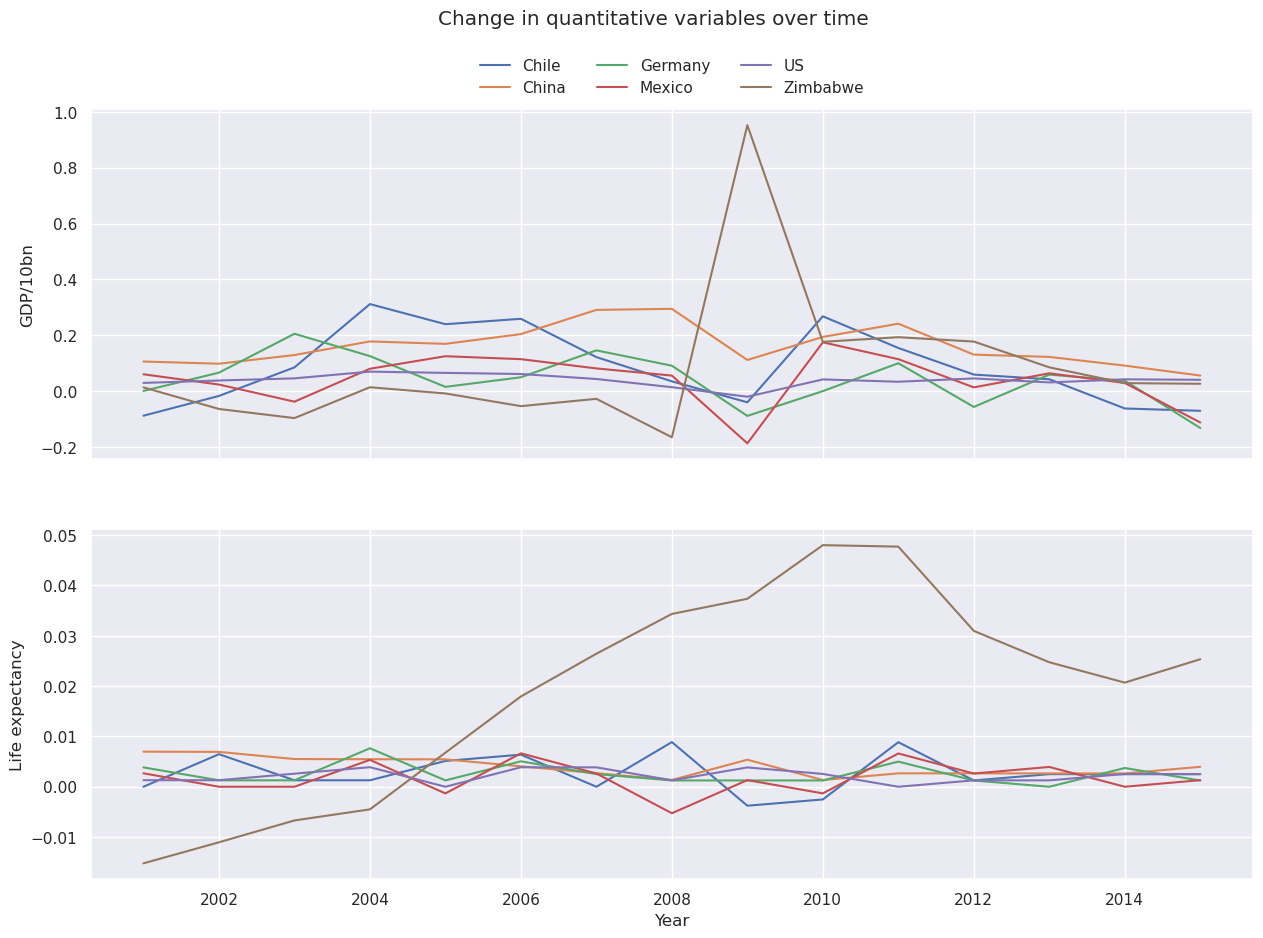

In [143]:
nrows = 2
ncols = 1

fig, ax = plt.subplots(nrows, ncols, figsize=(15,10), sharex=True, sharey=False)

sns.lineplot(data=data, ax=ax[0], x="Year", y="GDP_pct_ch", hue="Country")
sns.move_legend(ax[0], 'lower center', bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
sns.lineplot(data=data, ax=ax[1], x="Year", y="LEABY_pct_ch", hue='Country', legend=False)

fig.suptitle('Change in quantitative variables over time')

ax[0].set_ylabel('GDP/10bn')
ax[1].set_ylabel('Life expectancy')

plt.show()

Unsurprisingly, the United States, with China catching up, dominate the other countries in GDP, while the relative stagnation in GDP for countries like Zimbabwe and Chile are evident. In the top plot it is difficult to tell the poorer countries are so squished together that it is difficult to derive any additional information about these countries' GDP. The second plot from the top shows essentially the order of magnitude of the GDP's for the different countries, and we see that the GDP's are distributed more or less over three orders of magnitude. It is now more clear that there is in fact a noticable change in direction of the GDP chart at around the years 2008-2009.

Also, life expectancy is very similar for all countries except Zimbabwe, which despite a significant improvement over years still lags after the other countries. The improvement also seems to roughly coincide with the change in direction of the GDP at around the years 2008-2009.

<Axes: xlabel='GDP', ylabel='Life'>

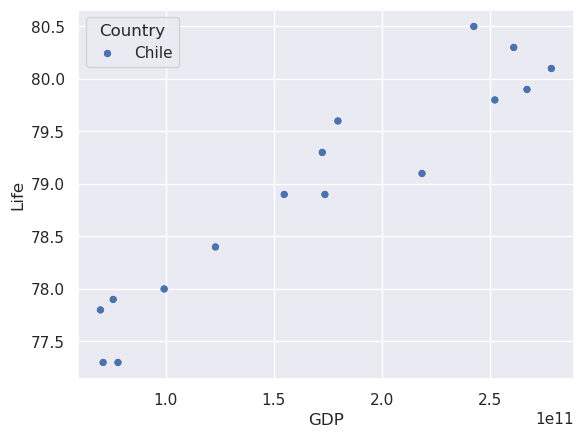

In [107]:
sns.scatterplot(data=data[data['Country'] == 'Chile'], y='Life', x='GDP', hue='Country')

In [61]:
for country in data['Country'].unique():
    print(country)
    print(data[data['Country'] == country][['GDP', 'Life']].corr())
    print(' ')

Chile
           GDP      Life
GDP   1.000000  0.949877
Life  0.949877  1.000000
 
China
           GDP      Life
GDP   1.000000  0.908526
Life  0.908526  1.000000
 
Germany
           GDP      Life
GDP   1.000000  0.932699
Life  0.932699  1.000000
 
Mexico
           GDP      Life
GDP   1.000000  0.932238
Life  0.932238  1.000000
 
United States of America
           GDP      Life
GDP   1.000000  0.981709
Life  0.981709  1.000000
 
Zimbabwe
         GDP    Life
GDP   1.0000  0.9662
Life  0.9662  1.0000
 


#### Post financial crisis in 2008